# DBSCAN Clustering

In [5]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [7]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
X = StandardScaler().fit_transform(X)#Normalizando los datos

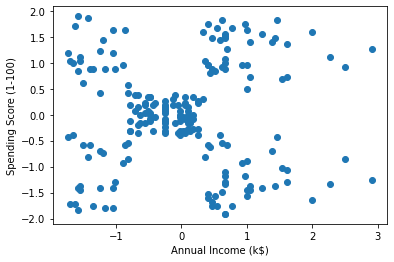

In [8]:
# Visualizing the dataset
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
# Fitting K-Means to the dataset

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
model = dbscan.fit(X)

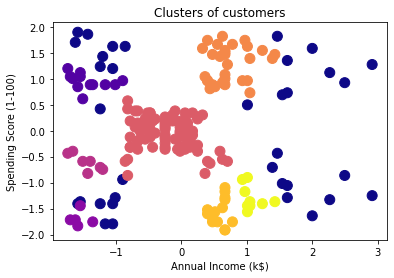

In [12]:
# Visualizing the clusters

y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s = 100, c = y_dbscan, cmap='plasma')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [13]:
y_dbscan

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [88]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [16]:
from sklearn import metrics
import numpy as np
labels = dbscan.labels_
#identify the core samples
core_samples = np.zeros_like(labels, dtype=bool)

core_samples[dbscan.core_sample_indices_]=True
#print(core_samples)

In [17]:
#Calculate the number of clusters
from collections import Counter 

n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
print('Number of clusters: %0.0f' % n_clusters_)
print('Number of total groups: %0.0f' % len(Counter(labels).keys()))

Number of clusters: 7
Number of total groups: 8


In [18]:
#Computing the silhouette score
print('Silhouette coefficient: %0.3f' % metrics.silhouette_score(X,labels))

Silhouette coefficient: 0.316


Optimal eps

In [19]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
#distances[:,1]

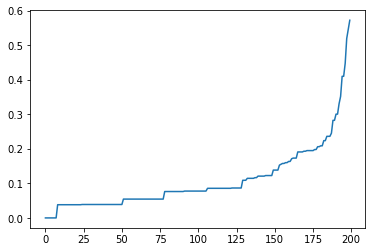

In [20]:
distances = np.sort(distances, axis=0)
distances2 = distances[:,1]
plt.plot(distances2)
plt.show()